# Information Extraction

## Unstructured Data in Banking and Finance

Information comes in many shapes and sizes. One important form is structured data, where there is a regular and predictable organization of entities and relationships. For example, we might be interested in the relation between companies and locations. Given a particular company, we would like to be able to identify the locations where it does business; conversely, given a location, we would like to discover which companies do business in that location. If our data is in tabular form, such as the example, then answering these queries is straightforward. Things are more tricky if we try to get similar information out of text. 

### An Example: Alternative Credit Data

Alternative credit data, sometimes simply identified with so-called "big data", are all those data that are not directly related to a customer's credit conduct. Alternative customer data can be obtained from a range of non-traditional data sources (e.g. digital platforms capable of providing information on consumer activity for credit risk assessment) and, in general, is a combination of information collected from multiple sources, including payment history, data extracted from social media, information related to online purchases. Below is a non-exhaustive list of some data sources that can be used in the process of assigning the rating to a customer:

- **Transactional Data**. This is typically data on how customers use their credit or debit cards. It may not seem like an "alternative" - most lenders already have this data, often manipulated into monthly summaries - but it is often not used to extract maximum predictive value. They can be used to generate a wide range of predictive characteristics (features) such as, for example, the 'Ratio between total balance and total spending in the last X weeks' or Spending ratios over different time horizons or you could think of characteristics based on the number , frequency and value of transactions for different types of purchases and / or resellers. Processing can take a long time because the data itself is generally not very clean.

- **Telecommunications data and other utilities**. This data is basically credit history data, but it is alternative because it doesn't actually appear in most credit reports. FICO extracted this data for the FICO® Score XD in the United States.

- **Data extracted from social profiles**. It is possible to extract data from Facebook, LinkedIn, Twitter, Instagram, Snapchat or other social media sites, but few lenders would like to challenge the regulatory hurdles posed by recent privacy laws. In theory, these obstacles could be circumvented simply by focusing not so much on the actual data but on the metadata, for example the number of posts and their frequency or the extent of the social network to which they belong, however at the moment there is a real risk that this would still raise privacy concerns. Furthermore, it should not be forgotten that this data has a strong bias as it is evidently possible that the consumer manipulates the underlying information.

- **Data obtained through survey / questionnaire**. An innovative new way of assessing the credit risk of someone with little or no credit history is through psychometrics. The leader in this field, EFL, bases its scores on 10 years of research at Harvard. FICO has partnered with EFL to measure people's ratings in markets around the world.

### Structured and Unstructured Data

#### Structured and semi-structured data

Structured data are those that comply with a predetermined set of rules or for which it is possible to define the type (date, name, number, characters, address) and the reciprocal relationships. Structured data depends on a schema and can be represented by rows and columns and stored in a central repository, typically a relational database, from which it can be retrieved separately or in a variety of combinations for processing and analysis.

In addition to structured data there are also semi-structured ones, which contain semantic tags without conforming to the typical structure associated with relational databases. It is schema-less data, not suitable for a relational database, which is represented by labels, graphs and trees. Examples of semi-structured data are email, HTML, XML files, mainly used to transmit data between a server and a web application.

#### Unstructured data

Unstructured data does not have a predefined template and cannot be organized into rows and columns. Examples of unstructured data are images, audio, video, email, spreadsheets, and objects stored as files. Unstructured data can, however, have very different origins: extracted from a human language with NLP (Natural Language Processing), acquired through sensors, extracted from social media, acquired from NoSQL databases. This feature makes it difficult to understand and its placement ambiguous.

Since most of the information is unstructured, it is understandable why, especially in "data driven" companies, the analysis of unstructured data has become essential for identifying purchasing habits, intercepting new trends, guiding the commercial offer and providing indications on how to improve the performance of a specific service or of the company as a whole.


### Information Extraction

In order to act on unstructured data, ML models have to perform one of the crucial processes called **Information Extraction(IE)**. Information Extraction is the process of retrieving key information intertwined within the unstructured data. In other words, **extracting structured data from the unstructured data**. Unfortunately, when it comes to mining these sources for usable data, it’s not quite so quick and easy. Sure, you can search documents for specific text, but what does that really tell you? Beyond word or phrase frequency, not much else. For these reasons you have to resort to sophisticated techniques of Text Analysis which employ a variety of methodologies to process the text, one of the most important of these being **Natural Language Processing (NLP)** that we have seen in the previous notebooks.

The picture below shows the architecture for a simple information extraction system. 

It begins by processing a document using several of the procedures discussed previously: first, the raw text of the document is split into sentences using a sentence segmenter, and each sentence is further subdivided into words using a tokenizer. Next, each sentence is tagged with part-of-speech tags, which will prove very helpful in the next step: **named entity detection**. In this step, we search for mentions of potentially interesting entities in each sentence. Finally, we use relation detection to search for likely relations between different entities in the text.

<!--
<div>
<img src="../07-pictures/09_information_extraction_pic_3.png" width="500"/>
</div>
-->
![pic](../07-pictures/09_information_extraction_pic_3.png)


*source: Bird S. et al. "Natural Language Processing with Python" O'Reilly (2009) on line edition Chapter 7*

## Named Entity Recognition

Named Entity Recognition (NER) is a natural language processing technique that uses machine learning to identify named entities in text data and classifies them into one or more predetermined categories. Entities can be names of people, organizations, locations, topics, interests, and more. Named Entity Recognition is used to automatically categorize news articles, customer feedback, customer support tickets, social media posts, and resumes.

Natural language-based named entity recognition enables you to effectively search unstructured data, to improve process efficiency, and create better personalized customer experiences.

The goal of a named entity recognition (NER) system is to identify all textual mentions of the named entities. This can be broken down into two sub-tasks: identifying the boundaries of the NE, and identifying its type. 

How do we go about identifying named entities? One option would be to look up each word in an appropriate list of names. For example, in the case of locations, we could use a gazetteer, or geographical dictionary. However, doing this blindly runs into problems because many named entity terms are ambiguous. Thus **May** and **North** are likely to be parts of named entities for **DATE** and **LOCATION**, respectively, but could both be part of a PERSON; conversely **Christian Dior** looks like a **PERSON** but is more likely to be of type **ORGANIZATION**. A term like Yankee will be ordinary modifier in some contexts, but will be marked as an entity of type ORGANIZATION in the phrase Yankee infielders.

Further challenges are posed by multi-word names like **Stanford University**, and by names that contain other names such as Cecil H. Green Library and Escondido Village Conference Service Center. In named entity recognition, therefore, we need to be able to identify the beginning and end of multi-token sequences.

### Example 1 - Reading the Newspaper

(See ***Example 1*** in Notebook ***05-natural-language-processing***)

Goal : Finding People and Organizations Cited in a Newspaper Article. 

Python libraries used: 
- nltk; 
- spaCy; 
- Stanford NER.

#### Using NLTK

In [17]:
import nltk

article = "Democrats took exceedingly narrow control of the Senate on Wednesday after winning both runoff elections in Georgia, granting them control of Congress and the White House for the first time since 2011. Democrat Jon Ossoff defeated Republican David Perdue, according to The Associated Press, making him the youngest member of the U.S. Senate and the first Jewish senator from Georgia. Earlier Raphael Warnock, a pastor from Atlanta, defeated GOP Sen. Kelly Loeffler after a bitter campaign. Warnock becomes the first Black Democrat elected to the Senate from a Southern state.The Senate will now be split 50-50 between the two parties, giving Vice President-elect Kamala Harris the tiebreaking vote."
print(article)

Democrats took exceedingly narrow control of the Senate on Wednesday after winning both runoff elections in Georgia, granting them control of Congress and the White House for the first time since 2011. Democrat Jon Ossoff defeated Republican David Perdue, according to The Associated Press, making him the youngest member of the U.S. Senate and the first Jewish senator from Georgia. Earlier Raphael Warnock, a pastor from Atlanta, defeated GOP Sen. Kelly Loeffler after a bitter campaign. Warnock becomes the first Black Democrat elected to the Senate from a Southern state.The Senate will now be split 50-50 between the two parties, giving Vice President-elect Kamala Harris the tiebreaking vote.


NLTK works very well with Stanford’s efficient NER implementation, which is a Java implementation of a NER system. This comes with well-designed function extractors for recognizing named entities and many options for defining function extractors, especially for the three classes (“person”, “organization”, “location”). 

We then import the tools to use the system produced by [Stanford NLP Group](https://nlp.stanford.edu/software/)  and see the result produced in output. Stanford NER is a Java implementation of a Named Entity Recognizer. Named Entity Recognition (NER) labels sequences of words in a text which are the names of things, such as person and company names, or gene and protein names. It comes with well-engineered feature extractors for Named Entity Recognition, and many options for defining feature extractors. Included with the download are good named entity recognizers for English, particularly for the 3 classes (PERSON, ORGANIZATION, LOCATION). The theory behind how this library works is quite complicated and we won't go into it further in these introductory notes. For those of you interested in the theory at this [link](https://nlp.stanford.edu/software/CRF-NER.html) you will find all the references as well as the instructions to download and install the java software.

In [18]:
from nltk.tag import StanfordNERTagger
# In order to make the following code work you need to install java sdk 8.0+ on your machine and make sure that 
# the path of the java executable is saved in the JAVAHOME environment variable
stanford_ner_tagger = StanfordNERTagger('./stanford-ner-2020-11-17/' + 'classifiers/english.muc.7class.distsim.crf.ser.gz',
                                        './stanford-ner-2020-11-17/' + 'stanford-ner-4.2.0.jar')

In [19]:
results = stanford_ner_tagger.tag(article.split())

In [20]:
print('Original article: %s \n' % (article))
for result in results:
    value = result[0]
    tag   = result[1]
    if tag != 'O':
        print('ER Type : %s, Value : %s' % (tag, value))

Original article: Democrats took exceedingly narrow control of the Senate on Wednesday after winning both runoff elections in Georgia, granting them control of Congress and the White House for the first time since 2011. Democrat Jon Ossoff defeated Republican David Perdue, according to The Associated Press, making him the youngest member of the U.S. Senate and the first Jewish senator from Georgia. Earlier Raphael Warnock, a pastor from Atlanta, defeated GOP Sen. Kelly Loeffler after a bitter campaign. Warnock becomes the first Black Democrat elected to the Senate from a Southern state.The Senate will now be split 50-50 between the two parties, giving Vice President-elect Kamala Harris the tiebreaking vote. 

ER Type : ORGANIZATION, Value : Senate
ER Type : DATE, Value : Wednesday
ER Type : ORGANIZATION, Value : Congress
ER Type : ORGANIZATION, Value : White
ER Type : ORGANIZATION, Value : House
ER Type : PERSON, Value : Jon
ER Type : PERSON, Value : Ossoff
ER Type : PERSON, Value : Da

#### Using spaCy

We can also try to perform the same process with the library, spaCy, which allows the support of a greater number of types of entities, such as person, nationality, buildings, events and so on. Let's modify the code as follows.

In [21]:
import spacy

First of all we have to download and install a trained pipeline (in this case `en_core_web_sm`), you can load it via spacy.load. This will return a Language object containing all components and data needed to process text. We call it `spacy_nlp`. Calling the nlp object on a string of text will return a processed Doc. In particular, When you call `spacy_nlp` on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the trained pipelines typically include a tagger, a lemmatizer, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.

<!--
<div>
<img src="../07-pictures/spacy_nlp_pipeline.png" width="500"/>
</div>
-->

![pic](../07-pictures/spacy_nlp_pipeline.png)


*source: spaCy [on line documentation](https://spacy.io/usage/spacy-101)*

In [22]:
article = "The fourth Wells account moving to another agency is the packaged paper-products division of Georgia-Pacific Corp., which arrived at Wells only last fall. Like Hertz and the History Channel, it is also leaving for an Omnicom-owned agency, the BBDO South unit of BBDO Worldwide. BBDO South in Atlanta, which handles corporate advertising for Georgia-Pacific, will assume additional duties for brands like Angel Soft toilet tissue and Sparkle paper towels, said Ken Haldin, a spokesman for Georgia-Pacific in Atlanta."

In [25]:
spacy_nlp = spacy.load("en_core_web_sm")
document  = spacy_nlp(article)
print('Original article: %s \n' % (article))
for element in document.ents:
    print('Type : %s, Value : %s' % (element.label_, element))

spacy.displacy.render(spacy_nlp(article), style='ent', jupyter=True)    

Original article: The fourth Wells account moving to another agency is the packaged paper-products division of Georgia-Pacific Corp., which arrived at Wells only last fall. Like Hertz and the History Channel, it is also leaving for an Omnicom-owned agency, the BBDO South unit of BBDO Worldwide. BBDO South in Atlanta, which handles corporate advertising for Georgia-Pacific, will assume additional duties for brands like Angel Soft toilet tissue and Sparkle paper towels, said Ken Haldin, a spokesman for Georgia-Pacific in Atlanta. 

Type : ORDINAL, Value : fourth
Type : ORG, Value : Wells
Type : ORG, Value : Georgia-Pacific Corp.
Type : ORG, Value : Wells
Type : ORG, Value : Hertz
Type : ORG, Value : the History Channel
Type : ORG, Value : Omnicom
Type : ORG, Value : BBDO South
Type : ORG, Value : BBDO Worldwide
Type : ORG, Value : BBDO South
Type : GPE, Value : Atlanta
Type : ORG, Value : Georgia-Pacific
Type : PERSON, Value : Angel Soft
Type : PERSON, Value : Ken Haldin
Type : ORG, Valu

Natural language processing applications are characterized by complex interdependent decisions that require large amounts of prior knowledge. In this case, as you can see, the system designed by Stanford did not achieve the same result as spaCy, but it is pure accident; in fact, a lot depends on how well the models have been trained and with how much data. For this reason, in case there is a need to perform a task like this, the best thing to do is to use multiple tools and compare the results, in order to find the best one in terms of performance and response.

## Chunking

In entity recognition, every token is tagged with an IOB label and then nearby tokens are combined together based on their labels. IOB labels (I-inside, O-out, B-beginning) are something similar to PoS tagging but it includes domain-specific custom labels. For instance, for the user request, ‘What is the price of American Airlines flight from New York to Los Angeles’ the tagged IOB labels are on the left. This IOB structure is provided by the model underlying the Entity Recognition engine. Below we present one of this model: Chunking.

Chunking is one of the rule-based text extraction processes which is used for building Named-entity recognition models. In chucking, a chunker chunks the phrases that are meaningful in a text. 
Chunking **works on top of POS tagging, it uses pos-tags as input and provides chunks as output**.
In simple words it is a generalization of tagging in which a contiguous sequence of words is assigned a single tag
It is also known as shallow parsing. The resulted group of words is called "chunks."
In shallow parsing, there is maximum one level between roots and leaves while deep parsing comprises of more than one level.
Shallow Parsing is also called light parsing or chunking.

![pic](../07-pictures/chunk-segmentation.png)

#### Noun Phrase Chunking

The chunker is built upon a set of production rules, otherwise known as Grammar Rules. For instance, in the case of NER, grammar can be a pattern to match a Noun Phrase, since Named-entities are mostly nouns.

A noun phrase, or nominal (phrase), is a phrase that has a noun (or indefinite pronoun) as its head or performs the same grammatical function as a noun. Noun phrases are very common cross-linguistically, and they may be the most frequently occurring phrase type. Noun phrases often function as verb subjects and objects, as predicative expressions and as the complements of prepositions. Noun phrases can be embedded inside each other; for instance, the noun phrase *some of his constituents* contains the shorter noun phrase *his constituents*.

As we have said, one of the most useful sources of information for NP-chunking is part-of-speech tags. This is one of the motivations for performing part-of-speech tagging in our information extraction system. Let's see a very simple example with a tagged text. The sentence is: "the little yellow dog barked at the cat". In order to focus on how chunking works, let's suppose that we have alredy parsed this simple phrase for POS tagging and assume this is the result:

In [85]:
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),("dog", "NN"), 
            ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]

Our sentence is split into a list of python couples where the first element is the single word and the other is the tag. 

In order to create an NP-chunker, we will first define a **chunk grammar**, consisting of rules that indicate how sentences should be chunked. In this case, we will define a simple grammar with a single regular-expression rule:

In [86]:
grammar = "NP: {<DT>?<JJ>*<NN>}" 

This rule says that an NP chunk should be formed whenever the chunker finds an **optional determiner (DT)** followed by **any number of adjectives (JJ)** and then **a noun (NN)**. 

Using this grammar, we create a chunk parser, and test it on our example sentence. The result is a tree, which we can either print, or display graphically 

In [87]:
cp = nltk.RegexpParser(grammar) 
result = cp.parse(sentence) 
print(result)

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [88]:
result.draw()

The rules that make up a chunk grammar use tag patterns to describe sequences of tagged words. A tag pattern is a sequence of part-of-speech tags delimited using angle brackets, e.g. $<DT>?<JJ>*<NN>$. Tag patterns are similar to regular expression patterns

In [89]:
pos_sent = "Demand/NN has/VBZ caught/VBN up/IN with/IN the/DT supply/NN of/IN certain/JJ types/NNS of/IN freight/NN transportation/NN ,/, and/CC rates/NNS are/VBP starting/VBG to/TO move/VB up/IN ''/'' at/IN a/DT rate/NN ``/`` close/RB to/TO or/CC slightly/RB more/JJR than/IN the/DT inflation/NN rate/NN ,/, ''/'' said/VBD Clifford/NNP Sayre/NNP ,/, director/NN of/IN logistics/NNS at/IN Du/NNP Pont/NNP Co/NNP"
pos_sent = pos_sent.split()
pos_list = []
for item in pos_sent:
    pos_list.append(tuple(item.split("/")))

In [90]:
grammar = "NP: {<DT>?<JJ>?<NN.*>+}" 

cp = nltk.RegexpParser(grammar) 
result = cp.parse(pos_list) 

print(result)

(S
  (NP Demand/NN)
  has/VBZ
  caught/VBN
  up/IN
  with/IN
  (NP the/DT supply/NN)
  of/IN
  (NP certain/JJ types/NNS)
  of/IN
  (NP freight/NN transportation/NN)
  ,/,
  and/CC
  (NP rates/NNS)
  are/VBP
  starting/VBG
  to/TO
  move/VB
  up/IN
  ''/''
  at/IN
  (NP a/DT rate/NN)
  ``/``
  close/RB
  to/TO
  or/CC
  slightly/RB
  more/JJR
  than/IN
  (NP the/DT inflation/NN rate/NN)
  ,/,
  ''/''
  said/VBD
  (NP Clifford/NNP Sayre/NNP)
  ,/,
  (NP director/NN)
  of/IN
  (NP logistics/NNS)
  at/IN
  (NP Du/NNP Pont/NNP Co/NNP))


In [91]:
result.draw()

In [92]:
grammar = r"""
  NP: {<DT|PP\$>?<JJ>*<NN>}   # chunk determiner/possessive, adjectives and noun
      {<NNP>+}                # chunk sequences of proper nouns
"""
cp = nltk.RegexpParser(grammar)
sentence = [("Rapunzel", "NNP"), ("let", "VBD"), ("down", "RP"),
                 ("her", "PP$"), ("long", "JJ"), ("golden", "JJ"), ("hair", "NN")]

In [93]:
print(cp.parse(sentence))

(S
  (NP Rapunzel/NNP)
  let/VBD
  down/RP
  (NP her/PP$ long/JJ golden/JJ hair/NN))


In [94]:
from nltk.corpus import brown

In [1]:
'''
cp = nltk.RegexpParser('CHUNK: {<V.*> <TO> <V.*>}')
brown = nltk.corpus.brown
for sent in brown.tagged_sents():
    tree = cp.parse(sent)
    for subtree in tree.subtrees():
         if subtree.label() == 'CHUNK': print(subtree)
'''         

"\ncp = nltk.RegexpParser('CHUNK: {<V.*> <TO> <V.*>}')\nbrown = nltk.corpus.brown\nfor sent in brown.tagged_sents():\n    tree = cp.parse(sent)\n    for subtree in tree.subtrees():\n         if subtree.label() == 'CHUNK': print(subtree)\n"

#### Representing Chunks: Tags vs Trees

As befits their intermediate status between tagging and parsing, chunk structures can be represented using either tags or trees. The most widespread file representation uses **IOB** tags. In this scheme, each token is tagged with one of three special chunk tags, **I** (***inside***), **O** (***outside***), or **B** (***begin***). A token is tagged as B if it marks the beginning of a chunk. Subsequent tokens within the chunk are tagged I. All other tokens are tagged O. The B and I tags are suffixed with the chunk type, e.g. B-NP, I-NP. Of course, it is not necessary to specify a chunk type for tokens that appear outside a chunk, so these are just labeled O. See in particular *Bird S. et al. Ch. 7* for further details.

### IOB Tag and the CoNLL 2000 Corpus

Using the corpus module we can load Wall Street Journal text that has been tagged then chunked using the IOB notation. The chunk categories provided in this corpus are NP, VP and PP. Each sentence is represented using multiple lines, as shown below:

In [96]:
'''
We PRP B-NP
saw VBD O
the DT B-NP
yellow JJ I-NP
dog NN I-NP
'''

'\nWe PRP B-NP\nsaw VBD O\nthe DT B-NP\nyellow JJ I-NP\ndog NN I-NP\n'

tree2conlltags,conlltags2tree are chunking utility functions.

→ `tree2conlltags`, to get triples of (word, tag, chunk tags for each token). These tuples are then finally used to train a tagger and it learns IOB tags for POS tags.

→ `conlltags2tree` to generate a parse tree from these token triples,  moreover, it permits us to choose any subset of the three chunk types to use, here just for NP chunks.
Conlltags2tree() is reversal of tree2conlltags(). 

We can use these functions to train our parser

In [97]:
text = """
he PRP B-NP
accepted VBD B-VP
the DT B-NP
position NN I-NP
of IN B-PP
vice NN B-NP
chairman NN I-NP
of IN B-PP
Carlyle NNP B-NP
Group NNP I-NP
, , O
a DT B-NP
merchant NN I-NP
banking NN I-NP
concern NN I-NP
. . O
"""

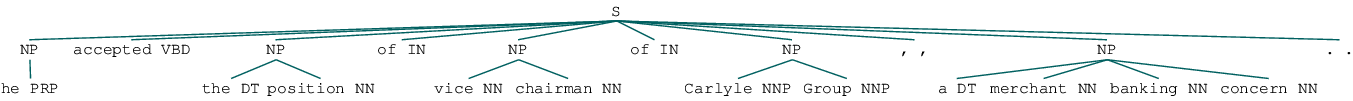

In [98]:
from nltk import conlltags2tree
tree = nltk.chunk.conllstr2tree(text, chunk_types=['NP'])
tree

We can use the NLTK corpus module to access a larger amount of chunked text. The CoNLL 2000 corpus contains 270k words of Wall Street Journal text, divided into "train" and "test" portions, annotated with part-of-speech tags and chunk tags in the IOB format. We can access the data using nltk.corpus.conll2000. Here is an example that reads the 100th sentence of the "train" portion of the corpus:

In [99]:
from nltk.corpus import conll2000
train_data = conll2000.chunked_sents('train.txt') 
text = train_data[99]
print(text)

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


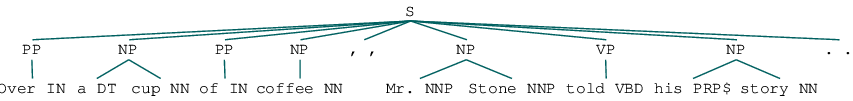

In [100]:
train_data[99]

In [101]:
from nltk.chunk.util import tree2conlltags,conlltags2tree

tree2conlltags(train_data[99])

[('Over', 'IN', 'B-PP'),
 ('a', 'DT', 'B-NP'),
 ('cup', 'NN', 'I-NP'),
 ('of', 'IN', 'B-PP'),
 ('coffee', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('Mr.', 'NNP', 'B-NP'),
 ('Stone', 'NNP', 'I-NP'),
 ('told', 'VBD', 'B-VP'),
 ('his', 'PRP$', 'B-NP'),
 ('story', 'NN', 'I-NP'),
 ('.', '.', 'O')]

## Relation Extraction

Once named entities have been identified in a text, we then want to extract the relations that exist between them. As indicated earlier, we will typically be looking for relations between specified types of named entity. One way of approaching this task is to initially look for all triples of the form (X, α, Y), where X and Y are named entities of the required types, and α is the string of words that intervenes between X and Y. We can then use regular expressions to pull out just those instances of α that express the relation that we are looking for. 

In [111]:
'''
.   This matches any character except a newline
*   Causes the resulting RE to match 0 or more repetitions of the preceding RE, as many repetitions as are possible
\b  Matches the empty string, but only at the beginning or end of a word.

then

.*\bin\b  Match any occurrence of the word 'in' preceded or followed by a white space. 

see https://docs.python.org/3/library/re.html

'''
import re

text = "New York is in the United Stases"
re.search(r'.*\bin\b', text)

<re.Match object; span=(0, 14), match='New York is in'>

In [112]:
text = "am I successfull in doing whell this lesson?"
re.search(r'.*\bin\b', text)

<re.Match object; span=(0, 19), match='am I successfull in'>

In [113]:
'''
(?!...) Matches if ... doesn’t match next. This is a negative lookahead assertion. 
        For example, Isaac (?!Asimov) will match 'Isaac ' only if it’s not followed by 'Asimov'.

+       Causes the resulting RE to match 1 or more repetitions of the preceding RE.

then

(?!\b.+ing\b) allows us to disregard strings such as 
              "am I successfull in doing whell this lesson?"
              where in is followed by a gerund.

see https://docs.python.org/3/library/re.html

'''
regex = r'.*\bin\b(?!\b.+ing\b)'
text1 = "New York is in the United Stases"
text2 = "am I successfull in doing whell this lesson?"

print(re.search(regex, text1))
print(re.search(regex, text2))

<re.Match object; span=(0, 14), match='New York is in'>
None


The following example searches for strings that contain the word in a nltk corpus. 

In [115]:
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    for rel in nltk.sem.extract_rels('ORG', 'LOC', doc,
                                     corpus='ieer', pattern = IN):
        print(nltk.sem.rtuple(rel))

[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']


## Case Study 1 : Analyze Transactional Data

The transaction historical record of a bank customer contains a very large set of information on the level of their income and expenses, when their expenses are made and on their geographical location. Furthermore, we can understand if it is a consumer mainly oriented towards e-commerce or if the expenses are of a more traditional type. As we have said, it is a very large set of information whose potential has mostly been left untapped at least until now. Aggregating a consumer's transaction history offers a unique opportunity to understand their financial profile and behavior. However, banks risk missing out on this opportunity because, thanks to the open banking regulation (PSD2) today, even the smallest fintech startup can build products and processes on that data.

Transaction information is often greatly abbreviated, with ambiguous conventions that often make it difficult for even customers themselves to recognize their transactions. Typically raw data often contains duplicate entries, long complicated text strings, and lots of numbers with very little context.

First of all it is necessary to remove the noise and translate the data into something that anyone can easily understand. In this the techniques of normalization and cleaning of textual data that we have previously mentioned are of great help. After that we can try one of the previous analysis to extract information from a generic unstructured string as in the example below. 

In this case we use a sample from an italian bank account. Let's say that you have one of the following strings to analize:

In [1]:
transaction = 'ORD: MARNI GROUP SRLVIA GIAN CARLO SISMONDI 7 0 B FILIALE DISPONENTE 00560 BON. SEPA 0306927697473309480959009590IT DEL 14.04.20 BIC: BCITITMMXXX INF:EE: 0230560001136 RI: /INV/22 31.1.20200560001136 CAUS: SUPP Rif Banca: 0480001036800039'
#transaction = 'ADDEBITO SDD N. 280986523 A FAVORE CREDIT DATA RESEARCH ITALIA SRL C D R ITALIA SRLCODICE MANDATO J1615481817 IMPORTO 366,00 COMMISSIONI 0,60 SPESE 0,00 Ft.N.3005/1V/2020 06/04/2020 Rif Banca: 4670001027400010'
#transaction = 'ADDEBITO SDD N. 279441904 A FAVORE GRENKE LOCAZIONE S.R.L. CODICE MANDATO 15310761 IMPORTO 1236,17 COMMISSIONI 0,60 SPESE 0,00 15310761 codice cliente 01.04.20-30.06.20 fattura numero 0000300051 importo lordo 1.236,17 imposta 222,92 Rif Banca: 4670001024500005'

First of all we have to download the [italian pipeline](https://spacy.io/models/it) optimized for CPU which contains the following components: tok2vec, morphologizer, tagger, parser, senter, ner, attribute_ruler, lemmatize. It comes in different size (small: sm, medium: md and large: lg) depending on the training set they have used. In windows you can open the Anaconda Prompt windows and enter the following command: 

`python -m spacy download it_core_news_lg`

In [3]:
import spacy

spacy_nlp = spacy.load("it_core_news_lg")
document  = spacy_nlp(transaction)
print('Original article: %s' % (transaction))
for element in document.ents:
    print('Type : %s, Value : %s' % (element.label_, element))

Original article: ORD: MARNI GROUP SRLVIA GIAN CARLO SISMONDI 7 0 B FILIALE DISPONENTE 00560 BON. SEPA 0306927697473309480959009590IT DEL 14.04.20 BIC: BCITITMMXXX INF:EE: 0230560001136 RI: /INV/22 31.1.20200560001136 CAUS: SUPP Rif Banca: 0480001036800039
Type : ORG, Value : MARNI GROUP
Type : ORG, Value : DISPONENTE
Type : LOC, Value : BON
Type : MISC, Value : BIC
Type : MISC, Value : BCITITMMXXX
Type : MISC, Value : CAUS
Type : MISC, Value : SUPP Rif


In [4]:
potential_org = []
for element in document.ents:
    if element.label_=='ORG':
        potential_org.append(element)

In [5]:
print(potential_org[0])

MARNI GROUP


In [8]:
# The BeautifulSoup Library for WEB Scraping
from bs4 import BeautifulSoup
from googlesearch import search

In [9]:
 # to search
query = str(potential_org[0])
 
for j in search(query):
    print(j)

https://www.marni.com/it
https://www.marni.com/it
https://www.marni.com/us
https://www.marni.com/it/Help/LegalArea/PrivacyPolicy
https://en.wikipedia.org/wiki/Marni_(fashion_house)
https://en.wikipedia.org/wiki/Marni_(fashion_house)
https://it.wikipedia.org/wiki/Marni
https://it.linkedin.com/company/marni-group-s.r.l.
https://it.linkedin.com/company/marni-group-s.r.l.
https://it.linkedin.com/company/marni
https://www.paginegialle.it/milano-mi/fashion-group
https://www.bloomberg.com/profile/company/1058444D:IM
https://www.informazione-aziende.it/Azienda_MARNI-GROUP-SRL-7A345
https://www.reportaziende.it/marni_group_srl_mi


In [10]:
transaction = 'ORD: MARNI GROUP SRLVIA GIAN CARLO SISMONDI 7 0 B FILIALE DISPONENTE 00560 BON. SEPA 0306927697473309480959009590IT DEL 14.04.20 BIC: BCITITMMXXX INF:EE: 0230560001136 RI: /INV/22 31.1.20200560001136 CAUS: SUPP Rif Banca: 0480001036800039'
#transaction = 'ADDEBITO SDD N. 280986523 A FAVORE CREDIT DATA RESEARCH ITALIA SRL C D R ITALIA SRLCODICE MANDATO J1615481817 IMPORTO 366,00 COMMISSIONI 0,60 SPESE 0,00 Ft.N.3005/1V/2020 06/04/2020 Rif Banca: 4670001027400010'
#transaction = 'ADDEBITO SDD N. 279441904 A FAVORE GRENKE LOCAZIONE S.R.L. CODICE MANDATO 15310761 IMPORTO 1236,17 COMMISSIONI 0,60 SPESE 0,00 15310761 codice cliente 01.04.20-30.06.20 fattura numero 0000300051 importo lordo 1.236,17 imposta 222,92 Rif Banca: 4670001024500005'

In [116]:
## Case Study 2 : Flight Booking System

## References and Credits

***Bird S. et al.***, "*Natural Language Processing with Python*" O'Reilly (2009) Chapter 7, [here](https://www.nltk.org/book/ch07.html) the online edition.

***Payoda Technology Inc***, ["*Extract meaningful information from Big Data using NLP and Machine Learning*"](https://payodatechnologyinc.medium.com/extract-meaningful-information-from-big-data-using-nlp-and-machine-learning-f76972b4b9ea) and references therein.

***Nikita Bachani***, ["*Chunking in NLP: decoded*"](https://towardsdatascience.com/chunking-in-nlp-decoded-b4a71b2b4e24) and reference therein.